In [1]:
from pythonbody import snap
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

In [2]:
# initialize run
# n100k = snap(data_path="/work/Tit7/DRAGON/Nbody6++GPU-May2022/petarcomp/100k_cluster/")
n100k = snap(data_path="/run/media/uli/ULIEXT/nbody_runs/N100k")

In [3]:
# list available snap files
n100k.snap_data

# note that this doesn't look at the contents of
# the snap files. To have a higher time resolution,
# the snap files can be analyzed by uncommenting
# the bottom line. THIS MIGHT TAKE A WHILE
# dependeing on the size of the project.

# n100k.analyze_files()

,time,file,step
0.0,0.0,/run/media/uli/ULIEXT/nbody_runs/N100k/snap.40...,0
1.0,1.0,/run/media/uli/ULIEXT/nbody_runs/N100k/snap.40...,0
2.0,2.0,/run/media/uli/ULIEXT/nbody_runs/N100k/snap.40...,0
3.0,3.0,/run/media/uli/ULIEXT/nbody_runs/N100k/snap.40...,0
4.0,4.0,/run/media/uli/ULIEXT/nbody_runs/N100k/snap.40...,0
...,...,...,...
2940.0,2940.0,/run/media/uli/ULIEXT/nbody_runs/N100k/snap.40...,0
2941.0,2941.0,/run/media/uli/ULIEXT/nbody_runs/N100k/snap.40...,0
2942.0,2942.0,/run/media/uli/ULIEXT/nbody_runs/N100k/snap.40...,0
2943.0,2943.0,/run/media/uli/ULIEXT/nbody_runs/N100k/snap.40...,0


In [4]:
# Load NB time step 1656
# returns some basic data of all stars
# See above for available time steps
n100k.load_cluster(1656.0)

,M,X1,X2,X3,V1,V2,V3,A1,A2,A3,...,NB-Sph,POT,R*,L*,Teff*,RC*,MC*,K*,NAME,Type
0,0.128024,2.385841,-4.204420,2.512420,3.158618,-3.971207,-5.432797,-1.147049e+10,1.760122e+10,-1.989940e+10,...,0.475051,-41.037163,0.147060,0.002873,3488.366699,0.0,0.0,0,7288,0
1,1.175865,2.385809,-4.204371,2.512364,0.118995,4.980511,-0.467922,1.248770e+09,-1.916152e+09,2.166455e+09,...,0.475547,-41.034729,1.000251,3.060124,7641.132324,0.0,0.0,1,7287,0
2,0.659138,-1.386117,0.442578,-0.864308,-3.723401,-2.961755,-7.477864,1.130982e+10,-1.007638e+10,-1.677552e+09,...,0.268409,-92.298477,0.596388,0.204620,5032.109863,0.0,0.0,0,2944,0
3,0.270822,-1.386078,0.442543,-0.864313,0.623611,3.498241,-2.434797,-2.752346e+10,2.452364e+10,4.084652e+09,...,0.269107,-92.425926,0.271900,0.014098,3818.208984,0.0,0.0,0,2943,0
4,0.245347,1.012453,0.333743,-0.990999,18.138487,-6.986281,-0.967459,6.683863e+09,-4.778086e+10,-4.250855e+10,...,0.235599,-98.890686,0.253522,0.011985,3796.921143,0.0,0.0,0,5860,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98357,0.463962,7.346551,-2.370663,1.295420,-0.873880,0.069725,1.135795,-1.221373e+05,4.341476e+04,-2.158768e+04,...,0.858330,-29.284988,0.410537,0.046453,4186.527832,0.0,0.0,0,40565,0
98358,0.173271,5.372622,-4.724232,1.189188,-2.692101,3.541507,-1.348021,-9.990645e+04,1.095257e+05,-2.499452e+04,...,0.654821,-59.565369,0.194358,0.006204,3678.271484,0.0,0.0,0,77253,0
98359,0.610795,-21.684790,5.551836,-5.083984,0.649133,-1.501646,-1.839826,4.483576e+03,-6.199236e+03,4.049772e+03,...,2.985947,-10.132421,0.546419,0.143325,4809.441895,0.0,0.0,0,32193,0
98360,0.174317,-27.157290,3.586303,-9.307677,-0.874081,-1.735659,-1.463955,-3.500351e+03,1.834188e+03,4.130673e+03,...,4.097414,-8.035696,0.195333,0.006286,3681.165039,0.0,0.0,0,77022,0


In [5]:
# now the class returns the cluster_data
n100k

,M,X1,X2,X3,V1,V2,V3,A1,A2,A3,...,NB-Sph,POT,R*,L*,Teff*,RC*,MC*,K*,NAME,Type
0,0.128024,2.385841,-4.204420,2.512420,3.158618,-3.971207,-5.432797,-1.147049e+10,1.760122e+10,-1.989940e+10,...,0.475051,-41.037163,0.147060,0.002873,3488.366699,0.0,0.0,0,7288,0
1,1.175865,2.385809,-4.204371,2.512364,0.118995,4.980511,-0.467922,1.248770e+09,-1.916152e+09,2.166455e+09,...,0.475547,-41.034729,1.000251,3.060124,7641.132324,0.0,0.0,1,7287,0
2,0.659138,-1.386117,0.442578,-0.864308,-3.723401,-2.961755,-7.477864,1.130982e+10,-1.007638e+10,-1.677552e+09,...,0.268409,-92.298477,0.596388,0.204620,5032.109863,0.0,0.0,0,2944,0
3,0.270822,-1.386078,0.442543,-0.864313,0.623611,3.498241,-2.434797,-2.752346e+10,2.452364e+10,4.084652e+09,...,0.269107,-92.425926,0.271900,0.014098,3818.208984,0.0,0.0,0,2943,0
4,0.245347,1.012453,0.333743,-0.990999,18.138487,-6.986281,-0.967459,6.683863e+09,-4.778086e+10,-4.250855e+10,...,0.235599,-98.890686,0.253522,0.011985,3796.921143,0.0,0.0,0,5860,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98357,0.463962,7.346551,-2.370663,1.295420,-0.873880,0.069725,1.135795,-1.221373e+05,4.341476e+04,-2.158768e+04,...,0.858330,-29.284988,0.410537,0.046453,4186.527832,0.0,0.0,0,40565,0
98358,0.173271,5.372622,-4.724232,1.189188,-2.692101,3.541507,-1.348021,-9.990645e+04,1.095257e+05,-2.499452e+04,...,0.654821,-59.565369,0.194358,0.006204,3678.271484,0.0,0.0,0,77253,0
98359,0.610795,-21.684790,5.551836,-5.083984,0.649133,-1.501646,-1.839826,4.483576e+03,-6.199236e+03,4.049772e+03,...,2.985947,-10.132421,0.546419,0.143325,4809.441895,0.0,0.0,0,32193,0
98360,0.174317,-27.157290,3.586303,-9.307677,-0.874081,-1.735659,-1.463955,-3.500351e+03,1.834188e+03,4.130673e+03,...,4.097414,-8.035696,0.195333,0.006286,3681.165039,0.0,0.0,0,77022,0


In [6]:
# only single stars
n100k.singles

,M,X1,X2,X3,V1,V2,V3,A1,A2,A3,...,NB-Sph,POT,R*,L*,Teff*,RC*,MC*,K*,NAME,Type
198,0.175454,-0.519644,0.779772,0.192146,2.149028,11.664628,-2.169843,9.171565e+05,1.951290e+06,4.189546e+05,...,0.159342,-113.661644,0.196387,0.006375,3684.252686,0.0,0.0,0,76747,0
239,1.069843,0.221523,-0.303410,-0.430020,-10.756642,3.228593,1.075386,3.533248e+06,9.894237e+05,3.378188e+06,...,0.135080,-122.254532,0.945595,2.006745,7072.094238,0.0,0.0,1,20630,0
272,0.344409,0.224526,-0.303340,-0.428457,7.438008,-3.731049,-1.848365,-1.379307e+07,5.067568e+05,-5.609813e+06,...,0.129736,-123.917694,0.322575,0.021351,3888.826904,0.0,0.0,0,50564,0
303,0.155196,0.030726,-0.907431,-0.140712,3.263390,-7.331185,2.345077,1.322102e+06,3.869365e+06,5.482288e+06,...,0.162372,-113.933792,0.176754,0.004810,3619.334717,0.0,0.0,0,81997,0
328,0.405182,0.031452,-0.906030,-0.137868,6.619847,6.049498,5.675497,-5.045451e+05,2.630716e+05,-1.851629e+06,...,0.174017,-112.727333,0.365392,0.030835,4005.530029,0.0,0.0,0,45029,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98357,0.463962,7.346551,-2.370663,1.295420,-0.873880,0.069725,1.135795,-1.221373e+05,4.341476e+04,-2.158768e+04,...,0.858330,-29.284988,0.410537,0.046453,4186.527832,0.0,0.0,0,40565,0
98358,0.173271,5.372622,-4.724232,1.189188,-2.692101,3.541507,-1.348021,-9.990645e+04,1.095257e+05,-2.499452e+04,...,0.654821,-59.565369,0.194358,0.006204,3678.271484,0.0,0.0,0,77253,0
98359,0.610795,-21.684790,5.551836,-5.083984,0.649133,-1.501646,-1.839826,4.483576e+03,-6.199236e+03,4.049772e+03,...,2.985947,-10.132421,0.546419,0.143325,4809.441895,0.0,0.0,0,32193,0
98360,0.174317,-27.157290,3.586303,-9.307677,-0.874081,-1.735659,-1.463955,-3.500351e+03,1.834188e+03,4.130673e+03,...,4.097414,-8.035696,0.195333,0.006286,3681.165039,0.0,0.0,0,77022,0


In [7]:
# calculate binding energy (POT_spec + KIN_spec)
n100k["Eb"]

0        -1.716276
1       -33.530285
2       -34.948425
3       -22.518408
4        22.199944
           ...    
98357   -13.109584
98358    -8.449023
98359    -4.337737
98360    -0.884807
98361    -5.338519
Name: Eb, Length: 98362, dtype: float32

In [8]:
# binary stars only
n100k.binaries

,M,X1,X2,X3,V1,V2,V3,A1,A2,A3,...,L*,Teff*,RC*,MC*,K*,NAME,Type,EKIN_spec,Eb_spec,Eb
0,0.128024,2.385841,-4.204420,2.512420,3.158618,-3.971207,-5.432797,-1.147049e+10,1.760122e+10,-1.989940e+10,...,0.002873,3488.366699,0.0,0.0,0,7288,0,27.631321,-13.405842,-1.716276
1,1.175865,2.385809,-4.204371,2.512364,0.118995,4.980511,-0.467922,1.248770e+09,-1.916152e+09,2.166455e+09,...,3.060124,7641.132324,0.0,0.0,1,7287,0,12.519298,-28.515430,-33.530285
2,0.659138,-1.386117,0.442578,-0.864308,-3.723401,-2.961755,-7.477864,1.130982e+10,-1.007638e+10,-1.677552e+09,...,0.204620,5032.109863,0.0,0.0,0,2944,0,39.277077,-53.021400,-34.948425
3,0.270822,-1.386078,0.442543,-0.864313,0.623611,3.498241,-2.434797,-2.752346e+10,2.452364e+10,4.084652e+09,...,0.014098,3818.208984,0.0,0.0,0,2943,0,9.277410,-83.148514,-22.518408
4,0.245347,1.012453,0.333743,-0.990999,18.138487,-6.986281,-0.967459,6.683863e+09,-4.778086e+10,-4.250855e+10,...,0.011985,3796.921143,0.0,0.0,0,5860,0,189.374405,90.483719,22.199944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98232,0.138490,-6.103106,-2.601711,-1.965849,0.231722,2.774259,-1.188444,0.000000e+00,0.000000e+00,0.000000e+00,...,0.003587,3546.169434,0.0,0.0,0,9274,-1,4.581304,-28.273449,-3.915581
98269,0.941333,-4.010427,-6.265451,3.633250,0.291736,2.841624,-0.574899,0.000000e+00,0.000000e+00,0.000000e+00,...,1.114258,6429.190430,0.0,0.0,1,1579,-1,4.245224,-23.479515,-22.102049
98270,0.679517,-4.008421,-6.266987,3.632619,0.102803,2.670384,-0.745983,0.000000e+00,0.000000e+00,0.000000e+00,...,0.236464,5127.227051,0.0,0.0,1,1580,-1,3.849006,-23.875732,-16.223970
98338,0.511988,-1.174099,-4.091257,-6.388970,-8.445153,-9.178412,41.256599,0.000000e+00,0.000000e+00,0.000000e+00,...,0.066860,4373.487305,0.0,0.0,0,9543,-1,928.835510,899.126892,460.342072


In [9]:
# show more detailed binary data
n100k.binaries_data

,M1,M2,cmX1,cmX2,cmX3,cmV1,cmV2,cmV3,relX1,relX2,relX3,relV1,relV2,relV3,K*1,K*2,NAME1,NAME2,POT_snap
0,0.128024,1.175865,2.385813,-4.204376,2.512370,0.417445,-0.811898,-0.955406,3.177173e-05,-4.875302e-05,5.511892e-05,3.039623,-8.951717,-4.964875,0,1,7288,7287,-41.037163
1,0.659138,0.270822,-1.386105,0.442568,-0.864309,-2.457470,-2.808295,-6.009229,-3.933495e-05,3.504701e-05,5.836647e-06,-4.347013,-6.459996,-5.043067,0,0,2944,2943,-92.298477
2,0.245347,2.126916,1.012460,0.333695,-0.991041,9.378500,-5.067194,-4.444708,-7.517701e-06,5.373493e-05,4.780676e-05,9.770484,-4.550218,3.878362,0,1,5860,5859,-98.890686
3,0.176590,0.113466,5.090899,-4.232162,-7.028563,0.499753,1.395543,0.942827,2.282655e-05,3.117052e-05,-5.579500e-05,-2.421022,4.012941,-2.134286,0,0,8615,8616,-23.791523
4,0.320939,0.915007,-1.855080,-0.791300,-0.119932,4.872915,-2.311146,-3.427777,-7.464889e-05,8.540048e-05,1.026952e-04,6.534372,0.394596,-1.909645,0,1,6964,6963,-83.466095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2126,0.226329,0.680659,-2.285882,-5.509901,0.871300,-0.547328,3.395147,-0.168200,-1.607223e-05,2.996645e-05,7.050816e-06,8.831133,4.711909,-0.131802,0,1,949,950,-67.853264
2127,0.216752,0.190986,-7.528961,0.532213,-3.005493,0.186927,-3.044756,0.401009,1.188121e-07,-1.557166e-08,-3.782826e-07,-13.194180,-57.785172,-1.765390,0,0,5215,5216,-39.985577
2128,0.754819,0.138490,-6.089506,-2.566983,-1.967872,1.443975,3.654304,-0.193581,7.425553e-05,5.954353e-05,-1.455825e-04,1.386561,1.023959,1.162750,1,0,9273,9274,-96.923088
2129,0.941333,0.679517,-4.007483,-6.239646,3.626772,0.229723,2.793280,-0.660263,-2.005627e-03,1.535646e-03,6.307004e-04,0.188932,0.171240,0.171084,1,1,1579,1580,-32.047745


In [10]:
# calculate relEB, cmEb and (total) Eb (all specific)
n100k.binaries_data[["relEb_spec","cmEb_spec", "Eb_spec"]]

,relEb_spec,cmEb_spec,Eb_spec
0,-12.954372,-40.164043,-39.838188
1,-32.427200,-67.280220,-40.578247
2,-75.485489,-32.196602,-10.230972
3,-5.121902,-22.248415,-24.992258
4,-11.490641,-63.047916,-37.063240
...,...,...,...
2126,-62.222939,-61.925819,-112.962494
2127,-2661.207520,-35.252430,-2523.692139
2128,-19.927353,-89.184853,-103.593277
2129,-2.630394,-27.902178,-30.123806


In [11]:
# note that after calculating Ebs, they shows up here (right most col)
n100k.binaries_data

,M1,M2,cmX1,cmX2,cmX3,cmV1,cmV2,cmV3,relX1,relX2,...,K*2,NAME1,NAME2,POT_snap,relEKIN_spec,relPOT,relEb_spec,cmEKIN_spec,cmEb_spec,Eb_spec
0,0.128024,1.175865,2.385813,-4.204376,2.512370,0.417445,-0.811898,-0.955406,3.177173e-05,-4.875302e-05,...,1,7288,7287,-41.037163,57.011272,-69.965645,-12.954372,0.873120,-40.164043,-39.838188
1,0.659138,0.270822,-1.386105,0.442568,-0.864309,-2.457470,-2.808295,-6.009229,-3.933495e-05,3.504701e-05,...,0,2944,2943,-92.298477,43.030289,-75.457489,-32.427200,25.018257,-67.280220,-40.578247
2,0.245347,2.126916,1.012460,0.333695,-0.991041,9.378500,-5.067194,-4.444708,-7.517701e-06,5.373493e-05,...,1,5860,5859,-98.890686,65.604263,-141.089752,-75.485489,66.694084,-32.196602,-10.230972
3,0.176590,0.113466,5.090899,-4.232162,-7.028563,0.499753,1.395543,0.942827,2.282655e-05,3.117052e-05,...,0,8615,8616,-23.791523,13.260109,-18.382011,-5.121902,1.543109,-22.248415,-24.992258
4,0.320939,0.915007,-1.855080,-0.791300,-0.119932,4.872915,-2.311146,-3.427777,-7.464889e-05,8.540048e-05,...,1,6964,6963,-83.466095,23.250235,-34.740875,-11.490641,20.418179,-63.047916,-37.063240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2126,0.226329,0.680659,-2.285882,-5.509901,0.871300,-0.547328,3.395147,-0.168200,-1.607223e-05,2.996645e-05,...,1,949,950,-67.853264,50.104187,-112.327126,-62.222939,5.927443,-61.925819,-112.962494
2127,0.216752,0.190986,-7.528961,0.532213,-3.005493,0.186927,-3.044756,0.401009,1.188121e-07,-1.557166e-08,...,0,5215,5216,-39.985577,1758.164673,-4419.372070,-2661.207520,4.733146,-35.252430,-2523.692139
2128,0.754819,0.138490,-6.089506,-2.566983,-1.967872,1.443975,3.654304,-0.193581,7.425553e-05,5.954353e-05,...,0,9273,9274,-96.923088,2.161516,-22.088869,-19.927353,7.738235,-89.184853,-103.593277
2129,0.941333,0.679517,-4.007483,-6.239646,3.626772,0.229723,2.793280,-0.660263,-2.005627e-03,1.535646e-03,...,1,1579,1580,-32.047745,0.047144,-2.677538,-2.630394,4.145567,-27.902178,-30.123806


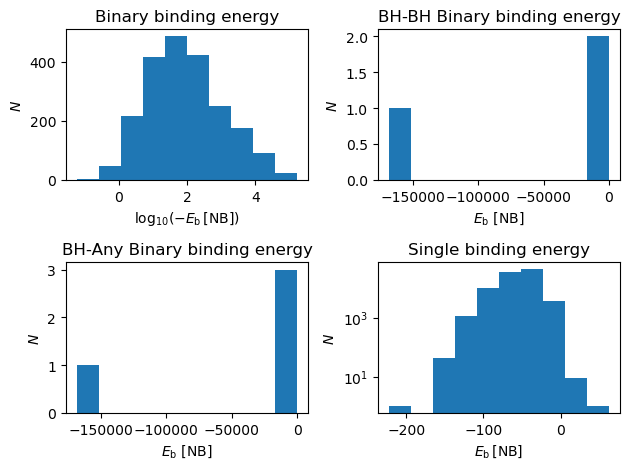

In [12]:
# Another histogram of all binary binding energy.
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
h = ax1.hist(np.log10(-n100k.binaries_data["relEb_spec"]))
ax1.set_xlabel(r"$\log_{10}(-E_\mathrm{b} \, \mathrm{[NB]})$")
ax1.set_ylabel(r"$N$")
ax1.set_title("Binary binding energy")

ax2 = fig.add_subplot(2,2,2)
hist = ax2.hist(n100k.filter("BH-BH")["relEb_spec"].values)
ax2.set_xlabel(r"$E_\mathrm{b}$ [NB]")
ax2.set_ylabel(r"$N$")
ax2.set_title("BH-BH Binary binding energy")

ax3 = fig.add_subplot(2,2,3)
hist = ax3.hist(n100k.filter("BH-Any")["relEb_spec"].values)
ax3.set_xlabel(r"$E_\mathrm{b}$ [NB]")
ax3.set_ylabel(r"$N$")
ax3.set_title("BH-Any Binary binding energy")

ax4 = fig.add_subplot(2,2,4)
hist = ax4.hist(n100k.singles["Eb_spec"].values)
ax4.set_yscale("log")
ax4.set_xlabel(r"$E_\mathrm{b} \, \mathrm{[NB]}$ ")
ax4.set_ylabel(r"$N$")
ax4.set_title("Single binding energy")


fig.tight_layout()
fig.savefig("01_m2n_eb.svg")

In [13]:
n100k.filter("BH-Any")

,M1,M2,cmX1,cmX2,cmX3,cmV1,cmV2,cmV3,relX1,relX2,...,K*2,NAME1,NAME2,POT_snap,relEKIN_spec,relPOT,relEb_spec,cmEKIN_spec,cmEb_spec,Eb_spec
717,20.360731,16.751062,0.060046,-0.127674,0.164238,-2.749294,1.816384,-0.751242,2.394764e-02,6.312691e-03,...,14,10036,10047,-131.942810,2.805145,-6.434048,-3.628902,5.711119,-126.231689,-123.617104
892,40.500000,29.324900,0.009002,0.004820,0.084866,1.571559,-0.063786,-0.026865,-3.095354e-05,1.181602e-04,...,14,10003,10024,-135.035126,318.096497,-1644.811157,-1326.714600,1.237294,-133.797836,-1498.843872
899,3.185838,22.680973,0.094818,-0.276388,0.245163,6.420279,-2.997501,1.014780,6.872981e-06,7.404200e-07,...,14,9494,10110,-130.163147,7659.691895,-15349.351562,-7689.659668,25.617386,-104.545761,-7514.141113
1680,16.626665,15.999809,-0.713883,7.244616,-2.903822,1.067889,1.759320,2.245305,1.037916e-07,-2.227434e-07,...,14,9987,9988,-40.538658,168718.375000,-337100.750000,-168382.375000,4.638495,-35.900162,-170033.953125


In [14]:
n100k.binaries_data.filter("BH-BH")

,M1,M2,cmX1,cmX2,cmX3,cmV1,cmV2,cmV3,relX1,relX2,...,K*2,NAME1,NAME2,POT_snap,relEKIN_spec,relPOT,relEb_spec,cmEKIN_spec,cmEb_spec,Eb_spec
717,20.360731,16.751062,0.060046,-0.127674,0.164238,-2.749294,1.816384,-0.751242,2.394764e-02,6.312691e-03,...,14,10036,10047,-131.942810,2.805145,-6.434048,-3.628902,5.711119,-126.231689,-123.617104
892,40.500000,29.324900,0.009002,0.004820,0.084866,1.571559,-0.063786,-0.026865,-3.095354e-05,1.181602e-04,...,14,10003,10024,-135.035126,318.096497,-1644.811157,-1326.714600,1.237294,-133.797836,-1498.843872
1680,16.626665,15.999809,-0.713883,7.244616,-2.903822,1.067889,1.759320,2.245305,1.037916e-07,-2.227434e-07,...,14,9987,9988,-40.538658,168718.375000,-337100.750000,-168382.375000,4.638495,-35.900162,-170033.953125


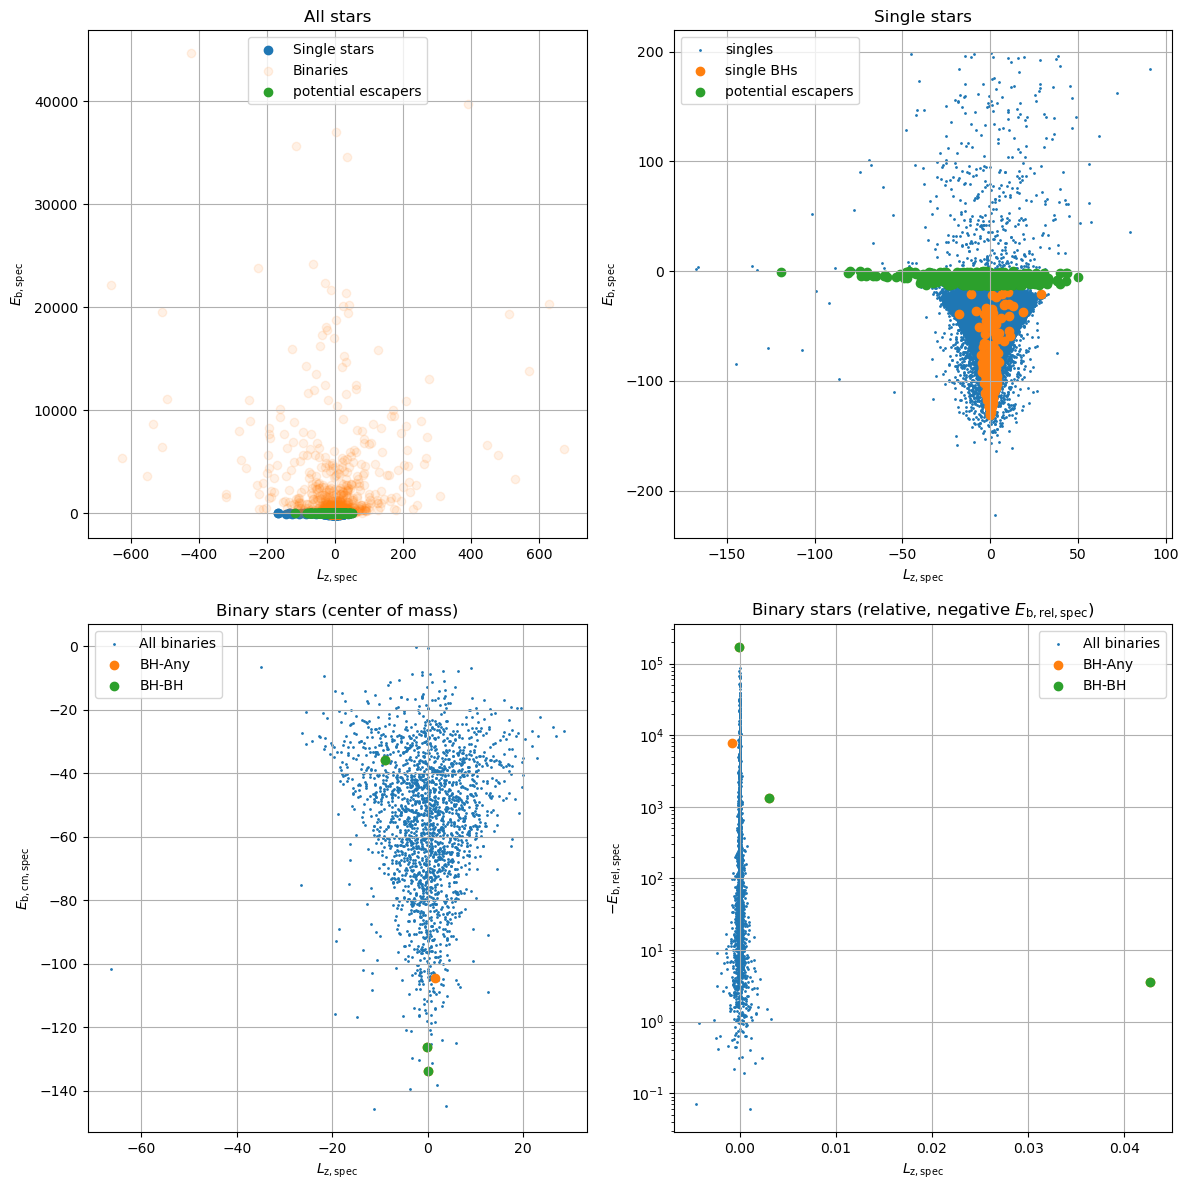

In [15]:
fig = plt.figure(figsize=(12,12))
gs = GridSpec(4, 2, figure=fig)

ax = fig.add_subplot(gs[0:2,0])
ax.scatter(n100k.singles["LZ_spec"],n100k.singles["Eb_spec"].values, label="Single stars")
ax.scatter(n100k.binaries["LZ_spec"],n100k.binaries["Eb_spec"].values, label="Binaries", alpha=0.1)
ax.scatter(n100k.potential_escapers["LZ_spec"],
           n100k.potential_escapers["Eb_spec"].values,
           label="potential escapers")

ax.set_xlabel(r"$L_\mathrm{z,spec}$")
ax.set_ylabel(r"$E_\mathrm{b,spec}$")
ax.set_title("All stars")
ax.grid()
ax.legend()

ax = fig.add_subplot(gs[0:2,1])
ax.scatter(n100k.singles[n100k.singles["Eb_spec"] < 200]["LZ_spec"],n100k.singles[n100k.singles["Eb_spec"] < 200]["Eb_spec"],label="singles",s=1)
ax.scatter(n100k.filter("SINGLE_BH")[n100k.filter("SINGLE_BH")["Eb_spec"] < 200]["LZ_spec"],
           n100k.filter("SINGLE_BH")[n100k.filter("SINGLE_BH")["Eb_spec"] < 200]["Eb_spec"],
           label="single BHs")
ax.scatter(n100k.potential_escapers[n100k.potential_escapers["Eb_spec"] < 200]["LZ_spec"],
           n100k.potential_escapers[n100k.potential_escapers["Eb_spec"] < 200]["Eb_spec"],
           label="potential escapers")
ax.set_xlabel(r"$L_\mathrm{z,spec}$")
ax.set_ylabel(r"$E_\mathrm{b,spec}$")
ax.set_title("Single stars")
ax.legend()
ax.grid()


ax = fig.add_subplot(gs[2:4,0])

ax.scatter(n100k.binaries_data["cmLZ_spec"],n100k.binaries_data["cmEb_spec"],label="All binaries",s=1)
ax.scatter(n100k.binaries_data.filter("BH-Any")["cmLZ_spec"],n100k.binaries_data.filter("BH-Any")["cmEb_spec"],label="BH-Any")
ax.scatter(n100k.binaries_data.filter("BH-BH")["cmLZ_spec"],n100k.binaries_data.filter("BH-BH")["cmEb_spec"],label="BH-BH")
ax.legend()
ax.set_xlabel(r"$L_\mathrm{z,spec}$")
ax.set_ylabel(r"$E_\mathrm{b,cm,spec}$")
ax.set_title("Binary stars (center of mass)")
ax.grid()

"""ax = fig.add_subplot(gs[2,1])
ax.scatter(n100k.binaries_data[n100k.binaries_data["relEb_spec"] > 0]["relLZ_spec"], 
           n100k.binaries_data[n100k.binaries_data["relEb_spec"] > 0]["relEb_spec"],label="All binaries",s=1)
ax.scatter(n100k.binaries_data[n100k.binaries_data["relEb_spec"] > 0].filter("BH-Any")["relLZ_spec"],
           n100k.binaries_data[n100k.binaries_data["relEb_spec"] > 0].filter("BH-Any")["relEb_spec"],label="BH-Any")
ax.scatter(n100k.binaries_data[n100k.binaries_data["relEb_spec"] > 0].filter("BH-BH")["relLZ_spec"],
           n100k.binaries_data[n100k.binaries_data["relEb_spec"] > 0].filter("BH-BH")["relEb_spec"],label="BH-BH")

ax.legend()
#ax.set_yscale("log")
ax.set_xlabel(r"$L_\mathrm{z,spec}$")
ax.set_ylabel(r"$E_\mathrm{b,rel,spec}$")
ax.set_title(r"Binary stars (relative, positive $E_\mathrm{b,rel,spec}$)")
ax.grid()"""

ax = fig.add_subplot(gs[2:4,1])
ax.scatter(n100k.binaries_data[n100k.binaries_data["relEb_spec"] < 0]["relLZ_spec"], 
           -n100k.binaries_data[n100k.binaries_data["relEb_spec"] < 0]["relEb_spec"],label="All binaries",s=1)
ax.scatter(n100k.binaries_data[n100k.binaries_data["relEb_spec"] < 0].filter("BH-Any")["relLZ_spec"],
           -n100k.binaries_data[n100k.binaries_data["relEb_spec"] < 0].filter("BH-Any")["relEb_spec"],label="BH-Any")
ax.scatter(n100k.binaries_data[n100k.binaries_data["relEb_spec"] < 0].filter("BH-BH")["relLZ_spec"],
           -n100k.binaries_data[n100k.binaries_data["relEb_spec"] < 0].filter("BH-BH")["relEb_spec"],label="BH-BH")

ax.legend()
ax.set_xlabel(r"$L_\mathrm{z,spec}$")
ax.set_ylabel(r"$-E_\mathrm{b,rel,spec}$")
ax.set_yscale("log")
ax.set_title(r"Binary stars (relative, negative $E_\mathrm{b,rel,spec}$)")
ax.grid()


fig.tight_layout()
fig.savefig("02_m2n_eb_lzspec.png")

In [ ]:
# Calculate some time evolution data
# this might take a while depending on
# the size of the project

# To reduce the amount of operations, the
# stepsize parameter is introduced. With a
# stepsize of N only every Nth snap file is
# used (or if analyze_files() was run, only
# every nth step (in the sence of total steps
# in the entire project) is used.)

# If only a specific time subset is of interest,
# the min_nbtime and max_nbtime paramaters are
# helpful.

# calculate Time evolution also allows masks to
# be passed. the Strings will be evaluated and
# Thus turned into a mask. Unfortunatly this 
# is very basic as of now, and a lot of internal
# structure must be known to properly make use
# of this feature.
# This example filters any star (and binaries)
# outside of the tidal radius.

n100k.calculate_time_evolution(
    # Start at NB time
    #min_nbtime=1000,
    # Stop at NB time
    #max_nbtime=2000,
    # Use every 100th snap file
    stepsize=100,
    # filter, e.g. ignore stars outside of RTIDE
    cluster_data_filter='self.cluster_data["R"] < self.scalar_data["RTIDE"]',
    # as Nbody treates binaries differently, this must also be done for binaries
    binaries_data_filter='self.binaries_data["R"] < self.scalar_data["RTIDE"]'
)

  7%|████▍                                                              | 2/30 [00:02<00:31,  1.13s/it]

In [ ]:
# top left figure: all lagr, similar to the standard nb radii
# top right figure: only few of them
# bottom left inner radii
# bottom right outer radii
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
axes = [ax1,ax2,ax3,ax4]
n100k.time_evolution["RLAGR"].plot(ax=ax1)
ax1.plot(n100k.time_evolution["DEBUG"]["RTIDE"], label="RTIDE", ls="--")
ax1.legend()
n100k.time_evolution["RLAGR"][["0.1", "0.3", "0.5", "0.9","0.95", "0.99"]].plot(ax=ax2)
n100k.time_evolution["RLAGR"][["0.01","0.03","0.05","0.1","0.2","0.3"]].plot(ax=ax3)
n100k.time_evolution["RLAGR"][["0.4","0.5","0.6","0.7","0.8","0.9","0.95"]].plot(ax=ax4)
print(f"Available Lagrangian radii: {', '.join(n100k.time_evolution['RLAGR_BH'].columns.values)}")
for ax in axes:
    ax.set_xlabel("Time [NB]")
    ax.set_ylabel("Lagrangian radius [NB]")
    if axes.index(ax) < 2:
        ax.set_title("Lagrangian radii")
    elif axes.index(ax) == 2:
        ax.set_title("Core lagrangian radii")
    elif axes.index(ax) == 3:
        ax.set_title("Outer lagrangian radii")
    ax.grid()
    
fig.tight_layout()
fig.savefig("03_m2n_rlagr.svg")

In [ ]:
# plot lagrangian radii for single black holes

n100k.time_evolution["RLAGR_BH"][["0.3", "0.5", "0.7"]].plot()
#plt.yscale("log")
plt.grid()
plt.xlabel("Time [NB]")
plt.ylabel("Lagrangian radii [NB]")
plt.title("Black hole lagrangian radii")
plt.savefig("04_m2n_rlagr_bh.svg")

In [ ]:
# plot BH-BH binding energy time evolution
np.log10(-n100k.time_evolution["E"]["Eb_spec_tot"]).plot(label="Total binding energy")
np.log10(-n100k.time_evolution["E"]["SINGLES_Eb_spec_tot"]).plot(label="Singles binding energy")
np.log10(-n100k.time_evolution["E"]["BINARIES_Eb_spec_tot"]).plot(label="Binaries binding energy")

np.log10(-n100k.time_evolution["E"]["Any-Any_Eb_tot"]).plot(label="Any-Any binary binding energy")
np.log10(-n100k.time_evolution["E"]["BH-Any_Eb_tot"]).plot(label="BH-Any binary binding energy")
np.log10(-n100k.time_evolution["E"]["BH-BH_Eb_tot"]).plot(label="BH-BH binary binding energy")

plt.grid()
plt.legend()
plt.xlabel("Time [NB]")
plt.ylabel(r"$\log_{10}(-E_\mathrm{b})$")
plt.title("Binding energy time evolution")
plt.savefig("05_m2n_eb_time.svg")

In [ ]:
# plot number of black hole binaries
fig = plt.figure()
ax = plt.gca()
n100k.time_evolution["N"]["BH-BH"].plot(ax=ax)

plt.xlabel("Time [NB]")
plt.ylabel("N")
plt.title("Number of BH-BH binaries")
plt.grid()
fig.savefig("07_m2n_n_bh_bh.svg")

In [ ]:
n100k.time_evolution["N"]["TOT"].plot()
n100k.time_evolution["N"]["SINGLES"].plot()
n100k.time_evolution["N"]["BINARIES"].plot()
n100k.time_evolution["N"]["SINGLE_BH"][100:].plot()
n100k.time_evolution["N"]["POTENTIAL_ESCAPERS"].plot()

plt.legend()
plt.grid()
plt.xlabel("Time [NB]")
plt.ylabel(r"$N$")
plt.title("Number evolution")
plt.yscale("log")


In [ ]:
n100k.time_evolution["M"]["TOT"].plot(label="total")
n100k.time_evolution["M"]["SINGLES"].plot(label="single stars")
n100k.time_evolution["M"]["BINARIES"].plot(label="binaries")
n100k.time_evolution["M"]["SINGLE_BH"][100:].plot(label="single BHs")
n100k.time_evolution["M"]["BH-BH"][100:].plot(label="BH-BH binaries")
n100k.time_evolution["M"]["BH-Any"][100:].plot(label="BH-Any binaries")
n100k.time_evolution["M"]["POTENTIAL_ESCAPERS"].plot(label="potential escapers")

plt.xlabel("Time [NB]")
plt.ylabel(r"$M$ [$M_\odot$]")
plt.title("Mass evolution")
plt.legend()
plt.grid()
plt.yscale("log")
plt.savefig("06_m2n_m_evolution.svg")